<a href="https://colab.research.google.com/github/BoothiEagle/ML-Midterm/blob/master/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.a 
Distance is a key notion underlying many machine learning algorithms, such as k-nearest neighbor (k-NN).
What problem is there with comparing consumers using regular Euclidean distance, for example when they are
described by age (in years), income (in dollars), and number of credit cards? How can this problem be fixed?


One of the primary issues with this Euclidean measure is that the scale of each variable can arbitrarily dominate the algorithms training, for instance, because age has a much smaller range than Income, and the number of credit cards likewise is a much smaller range than even age, we would expect the Euclidean distance to primarily be affected by income. Normalizing the data (typically mean 0, std dev 1) is one method we may use to overcome this problem, Standardizing the data to transform max and minimum values to 1-0 is another possibility. 

1.b  Explain what is the difference between clustering and classification.


Clustering is an unsupervised technique that can be used on unlabeled data to identify groupings of similar observations based on a given algorithm and computation of similarity and distance. This is often utilized to determine what underlying sub-groups within a larger population may exist and could be later used for aditional analysis. Classification seeks to use predictor variables to assign a given target variable a value that fits within a certain given range of possible values For instance, identifying a binary case of whether or not to offer a credit card would be such an example, with the "decision" being made on the basis of features in the dataset. This requires a labeling to evaluabe test-MSE and therefore efficacy.


1.c Explain what is the difference between regression and classification.


Regression and Classification both utilize labeled data and are supervised learning techniques. The primary difference is that regression yields an estimate that is on a scale, such as predicted income, wealth, or purchase volume. Classification would predict a category,, such as "high-spender",  "medium-spender", 'low-spender." The loss function underlying algorithms in both also differ as a result (deviance vs OLS for instance)'

1.d You would like to build a model for predicting defaults on student loans. You are given a large number of
categorical attributes of each loan such as the type of the school that a student is going to attend, the state where
it is located etc., as well as numerical attributes such as outstanding loan amount, student’s age, loan interest rate
and so on. Your client asks that your model must provide a clear explanation of the reason for its predictions,
since the final judgment on whether to give a loan or not will be made by a human agent. What machine learning
method would you suggest using? Explain why briefly (one or two sentences).


Given the need for interpretability, we might err toward using a decision tree, since any given outcome can be traced to a logical sequence of smaller decisions and thresholds that will relate to the attributes in the dataset. A logistic regression might also be appropriate but interpreting features is done on an importance or impact level rather then providing an exact logical map of a given classification decision.

1.e Explain why using ROC curves can be more effective for assessing model quality than the percent of classifications
that are correct (a.k.a. “vanilla” accuracy).

Vanilla accuracy will only give us (TP + TN / TP + FP  + FP + FN), in a dataset that is inherently unbalanced where perhaps only 1% of observations are a given category, such as "Spam" email, then a model which predicts no emails are SPAM would have 99% accuracy. Using an ROC curve, which plots TP Rate on Y and FP Rate on X gives us a clearer idea of how capable the model is at identifying True Positives versus False Positives as well (Precision).  Taking the Area Under the Curve (AUC) gives us a measure of performance across all possible classification thresholds.

1.d Performance of the k-nearest neighbor algorithm crucially depends on the choice of k. Explain the pros and cons
of using different values for k, for example k = 1 and k = n, where n is the total number of training examples.
How would you choose k?

Because the k-NN algorithm's parameter of model complexity is k, increasing or decreasing k directly affects the bias-variance tradeoff. A very low k will give us a very low bias but very high variance, as the model is mapping to each example in n. Were k to take the value of n, it would likewise be at the opposite extreme and have no variance but very high bias, as the estimate is based on the average of ALL observations n. One way of choosing k would be to vary k and continually compute training-MSE and test-MSE, identifying a value where test-MSE is at or near a local minimum.



2.4 Use k-means clustering to identify clusters of households based on the variables that describe the basis for purchase. When choosing a good value for the numbers of clusters, k, think about how the clusters would be used. It is likely that the marketing efforts would support two to five different promotional approaches. Consider scaling variables. Select what you think is the best segmentation and comment on the characteristics (demographic, brand loyalty, and basis for purchase) of these clusters. This information would be used to guide the development of advertising and promotional campaigns.

In [0]:
#Import Packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [13]:
#Import data

from google.colab import files
uploaded = files.upload()


Saving BathSoapHousehold.csv to BathSoapHousehold (3).csv


In [0]:
#Look at Dataset

import pandas_profiling
pandas_profiling.ProfileReport(df_BathSoap)

In [63]:
#Convert CSV to pd.DF
df_BathSoap = pd.read_csv('BathSoapHousehold.csv')
headers = df_BathSoap.iloc[0]
df_BathSoap  = pd.DataFrame(df_BathSoap.values[1:], columns=headers)

#Inspect the data
df_BathSoap.head()

df_BathSoap.describe()

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
count,600,600,600,600,600,600,600,600,600,600,...,600,600,600,600,600,600,600,600,600,600
unique,600,4,4,15,3,4,10,13,5,3,...,342,326,310,239,144,164,105,154,242,148
top,1120450,3,3,10,2,4,5,4,4,1,...,0,0,0,0,0,0,0,0,0,0
freq,1,150,332,326,511,287,189,147,267,443,...,252,264,288,355,456,436,496,443,345,451


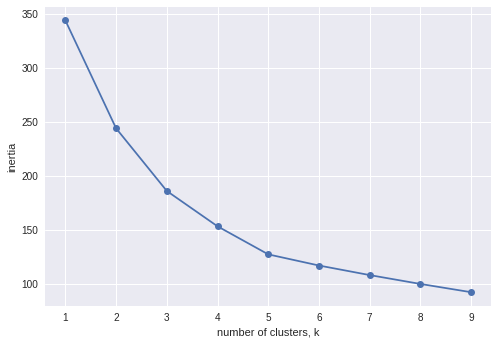

In [64]:
#Fit Unscaled

#Fit various KMeans models to data and compute Inertia. A value of K where inertia levels off ("elbow") will be rule of thumb used to select a k value.

#We will fit KMeans models on only the columns 31:45 which comprise the features within categories: " basis for purchase." which are: "Price Cat 1 to 4" and "Proposition Cat 5 to 15"

ks = range(1,10)
inertias = []

for k in ks:
  #Create a Kmeans instance with k clusters: model
  model = KMeans(n_clusters=k)
  #fit the model to Scaled Dataframe S_x
  model.fit(df_BathSoap.iloc[:,31:45])
  #Append inertias
  inertias.append(model.inertia_)

#Plot results 
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
#Scale the Features with significantly different variances: "Affluence Index"	"No. of Brands"	"Brand Runs"	"Total Volume"	"No. of  Trans"	"Value"	"Trans / Brand Runs"	"Vol/Tran"	"Avg. Price" 

Unscaled, we get 5 clusters using the features within the "Basis for Purchase" category

In [67]:
#StandardScaler to be used 
S_df_BathSoap = df_BathSoap.copy()
x = S_df_BathSoap.iloc[:, 10:18].values 
Standardisation = preprocessing.StandardScaler() 
S_x = Standardisation.fit_transform(x) 
S_df_BathSoap.iloc[:,10:18] = S_x
 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


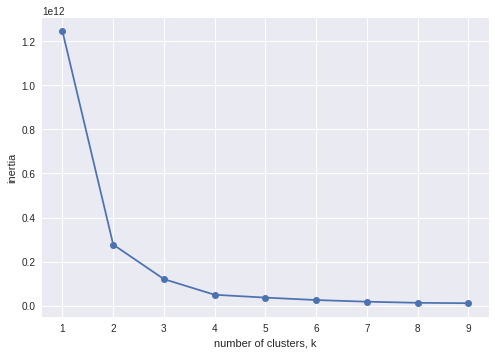

In [68]:

#A scaled dataset is clustered on in its entirety to assess reasonability of using 5 clusters. 

ks = range(1,10)
inertias = []

for k in ks:
  #Create a Kmeans instance with k clusters: model
  model = KMeans(n_clusters=k)
  #fit the model to Scaled Dataframe S_x
  model.fit(S_df_BathSoap)
  #Append inertias
  inertias.append(model.inertia_)

#Plot results 
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Results are not siginficantly different, the non-Scaled dataset will be used to keep interpretability of next analysis

In [0]:
#Fit KMeans model with selected clustering
Kmodel = KMeans(n_clusters=5)
predict = Kmodel.fit_predict(df_BathSoap)

#Append cluster to observation
df_BathSoap['Cluster'] = pd.Series(predict, index=df_BathSoap.index)


pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

#Check Cluster Info Is Appended

df_BathSoap.head()

In [0]:
#The dataset is exported to excel for more rapid Pivoting and Charting

df_BathSoap.to_csv('df.csv', index=False)
from google.colab import files
files.download('df.csv')

The relevant summary information from each of the model's clusters is now presented, with conclusions about the characteristics of each cluster following.

![alt text](https://i.postimg.cc/1XYvsCTp/Clusters-Pivots.png)

We can note that there are indeed differences across identifiable dimensions between our Clusters on demographic and Purchase behavior basis

![alt text](https://i.postimg.cc/zfBYk6Nr/Price-Categorywise-Purchase-per-Cluster.png)

![alt text](https://i.postimg.cc/KvHzLPB4/Cluster-Average-Brandwise-Purchase.png)

![alt text](https://i.postimg.cc/cLvv590Q/Cluster-Average-Selling-Proposition-Wise-Purchase.png)



![alt text](https://i.postimg.cc/4dtKJB3r/Descriptive-Cluster-Characteristics.png)


**3. A university has extensive dataset on its alumni, including past studies, demographic information by zip code, and past
donations. The university is planning to send a deluxe brochure and a donation request to some of the alumni. The
university has hired you to help with creating a targeting model under the assumptions:**

*   Donation amount may vary.
*   Alumni may spontaneously make a donation (even when not targeted).
*   Targeting cost is fixed $15 per individual.
*   Other than the targeting cost, there are no additional costs for alumni who are targeted and decide not to donate.



**You have been asked to build several data mining models that would suggest which alumni should be targeted. Use the
expected value framework to determine which models should be used to address the problem.
Note: It is sufficient to write down the correct expected value equations to identify the models that should be constructed.**

First, it is beneficial to outline the schema of our model decision framework:

At a high level, we wish to identify some possible classifiers or models and train them on our training data using a broad spectrum of hyperparameters, selecting our best model by identifying the model that acheives the best misclassification rate on our Test dataset.

We would then select a number of appropriate potential models, such as Logistical Regression, RandomForest, and a Boosted Tree (gbm) which have loss functions which will optimize for reducing misclassification. 

As shown below, we hope to compute a "Confusion Matrix" for each of these "best' models we train and convert this to Expected Rates (Misclassification Rate) . With this, we can apply our cost/benefit matrix to determine an expected model value with which we can make comparisons across models.




.


 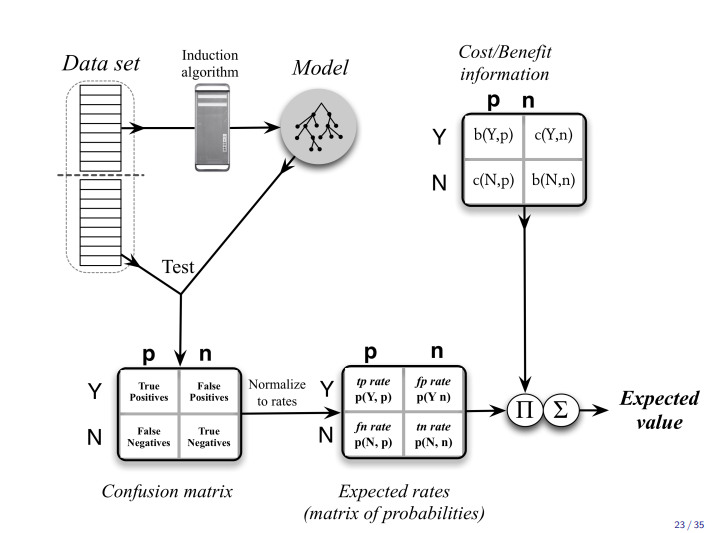

Let us define some terms:

 Let Pr(X) be the estimated probability of response of an Alumni
described by X as an input.

Let Vr be the benefit of a Alumni responding.

Let Vnr be the cost of a Alumni not-responding.

**Expected benefit of targeting = Pr(x) · Vr + [1 − Pr(X)] · Vnr**

Pr(X) = Output of each class of classification model reflecting probability of response . 

Vr = Expected Value of Alumni response. This could be a historical average donation to responsive Alumni if we assume this represents the "Target" population, which given the consistency in recipients sounds reasonable. This value is net of the Target Cost.

**Thus Vr = Average Response Donation = Cost to Target**

Vnr = Expected Value of Alumni  reponse without promotion.We know Alumni may spontaneously make a donation even when not targeted, therefore this should reflect the anticipated expected donation of a given individual were they not targeted or responding to a particular campaign LESS the targeting cost.

**Thus Vnr = Average Non-Response Donation - Cost to Target**





We would send a Brochure to any alumni for which the Pr(X) gives us a positive value

Example:

If Vr = $50

Vnr = $5

Cost to Target = $15


Pr(X) * (35) + ([1-Pr(X)])*(-10) > 0   --->    If Pr(X) > 22.2% we would target the Alumni

By multiplying the matrix of expected probabilities in each class by the cost/benefit of each class we would then calculate the model value in one distinct figure. We might compare various models on this basis and pick the one with the highest E(v)

Alternatively, we may find using our models that we are unable to arrive at accurate estimated probabilities or we have a considerable budget constraint, in which case it might be advisable to target a certain top cohort of ranked prospects.

If we assume our target population is stable (an alumni directory seems likely to be), then we might also wish to incorporate a Profti curve visualization. 

We will create a ranking of estimated probability of response and optimise the number of Alumni to reach out to based on when Maximum profit is achieved. A comparison of the various models will yield multiple curves from which we would choose the Profit and target the resulting x-axis value of Alumni.

Depending on which Model ( shown below as classifiers 1-3) we might use, there will be a maximum profit at a certain percentage cutoff . The maximum value across the three curves would be our profit-maximizing choice.



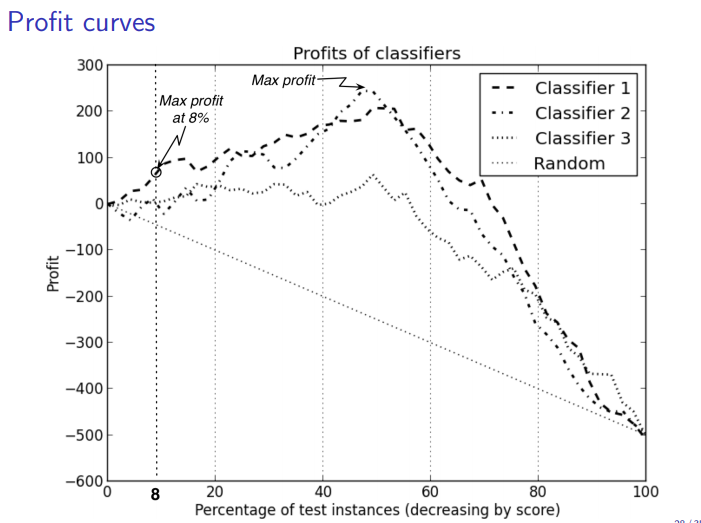

Further possible considerations: One could utilize a clustering method to identify distinguishable sub-populations within the Alumni directory, factors such as years since graduation or historical average donation might be pertinent to distinguishing "High Net Worth " individuals. Performing separate analysis on each sub-dataset could yield interesting results if the models were able to train and test better on these sub-populations and therefore achieve superior misclassifcation rates and by extension expected profitability. 

**4.1 Using the records in the training data, answer what is the effect of promotion?Of course, the goal of the initial campaign was not just to measure the average effect of the sending the promotional materials, but to try to identify a sub-population where the treatment might have a larger effect. You will build predictive models to identify these sub-populations.**

To answer this initial question, the rate of change in response between our target and control group will be looked at in the combined dataset of both Training and Test. Binarizing to 1 and 0 for outcome will give us a comparable figure with which to compare across the control and test groups.

In [33]:
#Import Training data

from google.colab import files
uploaded = files.upload()

Saving promotions_train (1).csv to promotions_train (1) (1).csv
Saving promotions_test.csv to promotions_test.csv


In [0]:
df_XTrain = pd.read_csv('promotions_train (1).csv')

#Inspect the data

df_XTrain.head()
df_XTrain.describe()
print(df_XTrain.columns)

df_XTest = pd.read_csv('promotions_test (1).csv')

df_XTest.head()
df_XTest.describe()
print(df_XTest.columns)

In [0]:
#Data is binarized and tabled in Excel - average of outcome in binarized 1-0 form gives percentage of 

![alt text](https://i.postimg.cc/prjN0VvF/Control-vs-Target.png)

We conclude that on an "average" basis there was not a notable change in the probability of positive outcome between test and control. Further sub-setting the data may show more interesting findings, however.

**4.2 Using the data in promotions_train.csv build a decision tree model, a random forest model and a boosting model for the variable outcome using input variables available (including the variable target_control). Discuss how you chose the input variables and parameters used to build the models. Among your three models, choose the best one in terms of predictive power. Which one is it? Why did you choose it?**

Note to the grader - I was unable to get my code to work for this problem, I have to the best of my ability outlined the steps and possible outcomes from each step, and what that might mean in the context of this question, in order to demonstrate my understanding to the best I can given I was unable to get my own results from my coding.

In [0]:
#import learners
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn import tree #DecisionTree
from sklearn.ensemble import RandomForestRegressor #Random Forest
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm


In [81]:
#Import binarized data
from google.colab import files
uploaded = files.upload()


Saving promotions_train_modified.csv to promotions_train_modified (3).csv
Saving promotions_test_modified.csv to promotions_test_modified (1).csv


In [0]:

names = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','target_control_binary','outcome_binary']
df_train = pd.read_csv('promotions_train_modified (3).csv',names=names)
train = pd.get_dummies(df_train)


df_test = pd.read_csv('promotions_test_modified (1).csv',names=names)
test = pd.get_dummies(df_test)

print(train.head())
print(test.head())


array_1 = train.values
array_2 = test.values

#Create training set
X_train=array_1[:,0:81]
Y_train=array_1[:,81]

#Create test set
X_test=array_2[:,0:20]
Y_test=array_2[:,20]



In [0]:
#Initialize Regressors
rf = RandomForestRegressor()
gbm = GradientBoostingClassifier

#set seed

seed = 20

In [0]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


# Use random grid to search for best hyperparameters
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, Y_train)

rf_random.best_params_



In [0]:
#Deviance loss function

In [0]:
lossf = function(y,phat,wht=0.0000001) {
   if(is.factor(y)) y = as.numeric(y)-1
   phat = (1-wht)*phat + wht*.5
   py = ifelse(y==1, phat, 1-phat)
   return(-2*sum(log(py)))
}

In [0]:
#Function for confusion matrix

getConfusionMatrix = function(y,phat,thr=0.5) {
   if(is.factor(y)) y = as.numeric(y)-1
   yhat = ifelse(phat > thr, 1, 0)
   tb = table(predictions = yhat, 
                   actual = y)  
   rownames(tb) = c("predict_0", "predict_1")
   return(tb)
}

In [0]:
#Mis-classification Rate
lossMR = function(y,phat,thr=0.5) {
   if(is.factor(y)) y = as.numeric(y)-1
   yhat = ifelse(phat > thr, 1, 0)
   return(1 - mean(yhat == y))

In [0]:
#Fit the Tree with a variety of settings using gridsearch


In [0]:
#Store prediction of phat

In [0]:
#Fit rf for variety of settings

p=ncol(trainDf)-1
mtryv = c(p, sqrt(p))
ntreev = c(500,1000)
(setrf = expand.grid(mtryv,ntreev))  # this contains all settings to try
colnames(setrf)=c("mtry","ntree")
phatL$rf = matrix(0.0,nrow(testDf),nrow(setrf))  # we will store results here

###fit rf
for(i in 1:nrow(setrf)) {
   #fit and predict
   frf = randomForest(y~., data=trainDf, 
                      mtry=setrf[i,1],
                      ntree=setrf[i,2],
                      nodesize=10)
   phat = predict(frf, newdata=testDf, type="prob")[,2]
   phatL$rf[,i]=phat
}

In [0]:
#Fit GBM with another gridsearch for parameters
#Convert categorical Value1, Value2...etc to 1-4

In [0]:
```{r}
nrun = nrow(setrf)
for(j in 1:nrun) {
  print(setrf[j,])
  print("Confusion Matrix:")
  print(getConfusionMatrix(testDf$y, phatL[[2]][,j], 0.5))
  cat('Missclassification rate = ', lossMR(testDf$y, phatL[[2]][,j], 0.5), '\n')
}
```

\newpage

For **boosting** we have:
```{r}
nrun = nrow(setboost)
for(j in 1:nrun) {
  print(setboost[j,])
  print("Confusion Matrix:")
  print(getConfusionMatrix(testDf$y, phatL[[3]][,j], 0.5))
  cat('Missclassification rate = ', lossMR(testDf$y, phatL[[3]][,j], 0.5), '\n')
}

In [0]:
#Analyze Results

In [0]:
```{r}
nrun = nrow(setrf)
for(j in 1:nrun) {
  print(setrf[j,])
  print("Confusion Matrix:")
  print(getConfusionMatrix(testDf$y, phatL[[2]][,j], 0.5))
  cat('Missclassification rate = ', lossMR(testDf$y, phatL[[2]][,j], 0.5), '\n')
}
```

\newpage

For **boosting** we have:
```{r}
nrun = nrow(setboost)
for(j in 1:nrun) {
  print(setboost[j,])
  print("Confusion Matrix:")
  print(getConfusionMatrix(testDf$y, phatL[[3]][,j], 0.5))
  cat('Missclassification rate = ', lossMR(testDf$y, phatL[[3]][,j], 0.5), '\n')
}

In [0]:
#Plot test set loss vs deviance

In [0]:
lossL = list()
nmethod = length(phatL)
for(i in 1:nmethod) {
   nrun = ncol(phatL[[i]])
   lvec = rep(0,nrun)
   for(j in 1:nrun) lvec[j] = lossf(testDf$y, phatL[[i]][,j])
   lossL[[i]]=lvec; names(lossL)[i] = names(phatL)[i]
}
lossv = unlist(lossL)
plot(lossv, ylab="loss on Test", type="n")
nloss=0
for(i in 1:nmethod) {
   ii = nloss + 1:ncol(phatL[[i]])
   points(ii,lossv[ii],col=i,pch=17)
   nloss = nloss + ncol(phatL[[i]])

In [0]:
#Choose the method class with lowest error on the validation set

In [0]:
nmethod = length(phatL)
phatBest = matrix(0.0,nrow(testDf),nmethod) #pick off best from each method
colnames(phatBest) = names(phatL)
for(i in 1:nmethod) {
   nrun = ncol(phatL[[i]])
   lvec = rep(0,nrun)
   for(j in 1:nrun) lvec[j] = lossf(testDf$y,phatL[[i]][,j])
   imin = which.min(lvec)
   phatBest[,i] = phatL[[i]][,imin]
   phatBest[,i] = phatL[[i]][,1]

In [0]:
#Plot plot $/hat p$ for best models on the test set and compare across methods

In [0]:
#Introduction of cost-benefit numbers allows us to compute cost-benefit matrix

In [0]:
Our **cost/benefit matrix** looks like this
```{r}
cost_benefit = matrix(c(0,-10,0,100), nrow=2)
print(cost_benefit)

We will arrive at a threshold Probability to extend credit, and then apply that rule to each method based on the predicted probabilites and compute the net vexpected value of each model for comparison

In [0]:
onfMat = getConfusionMatrix(testDf$y, phatBest[,1], 0.2)
print(confMat)
cat("Expected value of tree = ", 
    sum(sum(confMat * cost_benefit)), "\n")
```

```{r}
confMat = getConfusionMatrix(testDf$y, phatBest[,2], 0.2)
print(confMat)
cat("Expected value of random forests = ", 
    sum(sum(confMat * cost_benefit)), "\n")
```

```{r}
confMat = getConfusionMatrix(testDf$y, phatBest[,3], 0.2)
print(confMat)
cat("Expected value of boosting = ", 
    sum(sum(confMat * cost_benefit)), "\n")

We can then use a ROC curve to evaluate performance (given profit equation) for our model across confusion matrix continuum

In [0]:
plot(c(0,1),c(0,1),xlab='FPR',ylab='TPR',main="ROC curve",cex.lab=1,type="n")
for(i in 1:ncol(phatBest)) {
   pred = prediction(phatBest[,i], testDf$y)
   perf = performance(pred, measure = "tpr", x.measure = "fpr")
   lines(perf@x.values[[1]], perf@y.values[[1]],col=i)
}
abline(0,1,lty=2)
legend("topleft",legend=names(phatL),col=1:nmethod,lty=rep(1,nmethod))

We then use Lift curves to assess the ratio of our model to random guess given a number of samples


In [0]:
pred = prediction(phatBest[,1], testDf$y)
perf = performance(pred, measure = "lift", x.measure = "rpp")
plot(perf, col=1, ylim=c(0,5))
abline(h=1, lty=2)

for(i in 2:ncol(phatBest)) {
   pred = prediction(phatBest[,i], testDf$y)
   perf = performance(pred, measure = "lift", x.measure = "rpp")
   lines(perf@x.values[[1]], perf@y.values[[1]],col=i)
}
legend("topright",legend=names(phatL),col=1:nmethod,lty=rep(1,nmethod))

In [0]:
red = prediction(phatBest[,1], testDf$y)
perf = performance(pred, measure = "tpr", x.measure = "rpp")
plot(perf, col=1, ylim=c(0,1))
abline(h=1, lty=2)
abline(0,1,lty=2)
for(i in 2:ncol(phatBest)) {
   pred = prediction(phatBest[,i], testDf$y)
   perf = performance(pred, measure = "tpr", x.measure = "rpp")
   lines(perf@x.values[[1]], perf@y.values[[1]],col=i)

**4.4) For each record in the test set, compute the uplift defined as
P(outcome = positive | target_control = target, x) − P(outcome = positive | target_control = control, x)
Report the uplift for the first three records**

In [0]:
#Define uplift and apply to test set
#Pull top three records

We are hoping to identify second-order effects in order to determine causality, which would be of the most importance to our client given they are trying to optimize marketing budget based on the highest possible impact. High positive values indicates the impact of the promotion is greatest for that group on a conditional probability basis. 

**4.5) Sort the customers according to the estimated uplift from largest to lowest and divide them into 30 bins
(each bin will have 100 customers). For each bin, estimate the effect of promotion P(outcome = positive |
target_control = target) − P(outcome = positive | target_control = control). Plot the effect of promotion
against the index of the bin. This plot shows you the increase in response rate against the number of promotions
sent (in increments of 100).**

In [0]:
#Sort df by Uplift column descending
#Divide dataset into new "groups" every 100 rows
#Plot X axis of Bins 1-30 vs Y of Uplift 


Indication of successful targeting will be that bins with the highest expectation of uplift based on bin ranking 1-30 will indeed show this.

**4.6 Suppose that sending a promotion costs 10 and getting a new card is worth 100 to the bank. When should
we stop sending promotions in this case? By looking at the graph from the previous part, roughly to how many
customers would we send the promotion?**

We would solve for the number of customers where expected lift is approximately equal to the cost of targeting, so somehwere around 10 dollars. There would be a given number of bins, likely a fraction of the total, which we would be worthwhile in targeting. 

The critical element here for our customer is determining the causal link between sending the promotion and generating a response from the customer of sufficient probability to justify the cost. The Uplift analysis gives us a clearer notion of where the cutoff is in terms of number of customers to send the promotion to. 